#### The Objective:,
    Indentify Patterns of appliance from UCI ,
    Individual household electric power consumption Data Set,
    https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption,
    ##### Version 3,
    ##### 14/02/2020
    
    run a cluster tecnic to find compare patterns of the data 

##### Load the data

In [16]:
import pandas as pd

pattern_from_sevendays_df = pd.read_csv('~\Documents\Projects-onJupyterN\EnergyConsumption_detectApliance\Data\subm3_pattern.csv',
                                       sep=",", 
                                       header=0,
                                    index_col=0)

In [73]:
#print(pattern_from_sevendays_df.dtypes)
print(pattern_from_sevendays_df.columns)
pattern_from_sevendays_df.isnull().sum()
print("Attribute Information: \n 1.date:.Date in format dd/mm/yyyy \n 2.time: time in format hh:mm:ss \n 3.global_active_power: household global minute-averaged active power (in kilowatt) \n 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) \n 5.voltage: minute-averaged voltage (in volt) \n 6.global_intensity: household global minute-averaged current intensity (in ampere) \n 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy).\n It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).\n 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy).\n It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. \n 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy).\n It corresponds to an electric water-heater and an air-conditioner."),
pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == -0].head(10)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'cluster'], dtype='object')
Attribute Information: 
 1.date:.Date in format dd/mm/yyyy 
 2.time: time in format hh:mm:ss 
 3.global_active_power: household global minute-averaged active power (in kilowatt) 
 4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
 5.voltage: minute-averaged voltage (in volt) 
 6.global_intensity: household global minute-averaged current intensity (in ampere) 
 7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy).
 It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
 8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy).
 It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
 9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy).
 It corresponds to an electric wat

,0,1,2,3,4,5,6,7,8,9,cluster
0,17.0,16.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,16.0,0
1,17.0,17.0,16.0,17.0,17.0,17.0,17.0,17.0,18.0,17.0,0
2,16.0,17.0,16.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,0
3,17.0,17.0,16.0,17.0,17.0,17.0,18.0,17.0,17.0,18.0,0
4,16.0,17.0,17.0,16.0,17.0,16.0,18.0,17.0,17.0,17.0,0
5,17.0,17.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0,17.0,0
6,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,0
7,16.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0,17.0,17.0,0
8,17.0,17.0,16.0,17.0,17.0,17.0,17.0,16.0,17.0,17.0,0
9,16.0,17.0,16.0,17.0,17.0,16.0,17.0,16.0,17.0,16.0,0


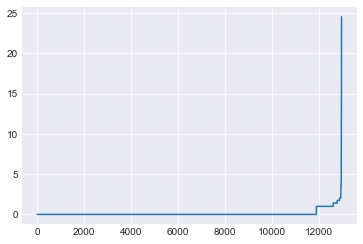

In [44]:
## Find the optimal eps
import numpy as np
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pattern_from_sevendays_df)
distances, indices = nbrs.kneighbors(pattern_from_sevendays_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [117]:
from sklearn.cluster import DBSCAN
random_state = 170
pattern_from_sevendays_df["cluster"] = DBSCAN(eps=2, min_samples=12).fit_predict(pattern_from_sevendays_df)

pattern_from_sevendays_df["cluster"].value_counts()

 1    7587
 0    4756
-1     540
 2      18
 5      17
 4      15
 3      14
 6      13
Name: cluster, dtype: int64

In [21]:
pattern_from_sevendays_df.shape

(12960, 11)

Text(0.5, 1.0, 'Group -1')

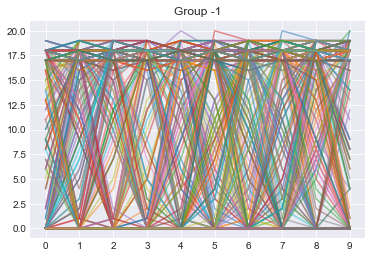

In [118]:
import matplotlib.pyplot as plt

# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig12, ax12 = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == -1].index:
    ax12.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
              alpha = 0.5
           )
ax12.set_title('Group -1')

Text(0.5, 1.0, 'Group 0 ')

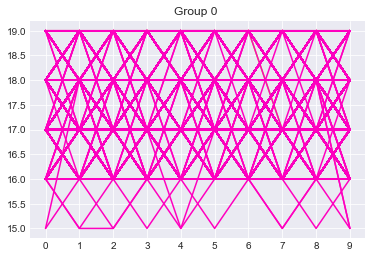

In [120]:

# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig, ax = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == 0].index:
    ax.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
            color=palette(row)
           )
ax.set_title('Group 0 ')


Text(0.5, 1.0, 'Group 1 ')

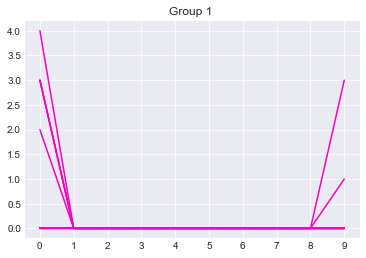

In [121]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig2, ax2 = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == 1].index:
    ax2.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
            color=palette(row)
           )
ax2.set_title('Group 1 ')

Text(0.5, 1.0, 'Group 2 ')

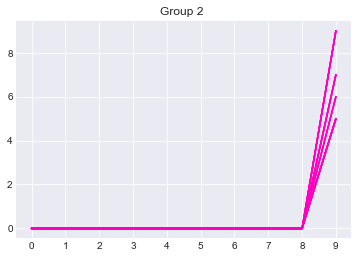

In [122]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig3, ax3 = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == 2].index:
    ax3.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
            color=palette(row)
           )
ax3.set_title('Group 2 ')



Text(0.5, 1.0, 'Group 3 ')

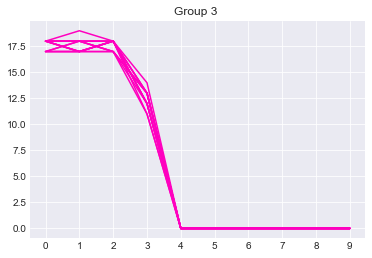

In [123]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig4, ax4 = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == 3].index:
    ax4.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
            color=palette(row))
ax4.set_title('Group 3 ')



Text(0.5, 1.0, 'Group 4 ')

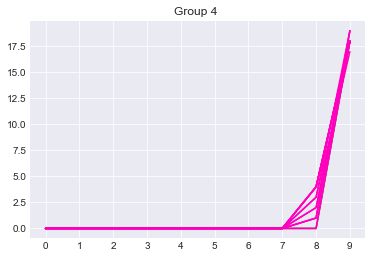

In [127]:
##### style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig5, ax5 = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == 4].index:
    ax5.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
            color=palette(row)
           )
ax5.set_title('Group 4 ')



Text(0.5, 1.0, 'Group 5 ')

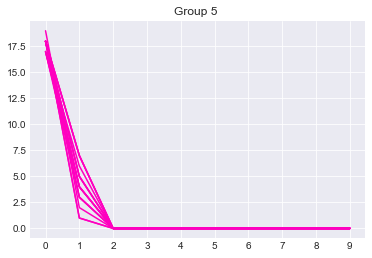

In [128]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig6, ax6 = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == 5].index:
    ax6.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
            color=palette(row)
           )
ax6.set_title('Group 5 ')


Text(0.5, 1.0, 'Group 6 ')

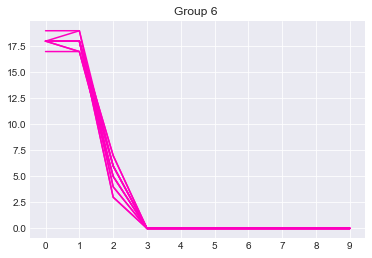

In [129]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig7, ax7 = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == 6].index:
    ax7.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
            color=palette(row)
           )
ax7.set_title('Group 6 ')

Text(0.5, 1.0, 'Group 7 ')

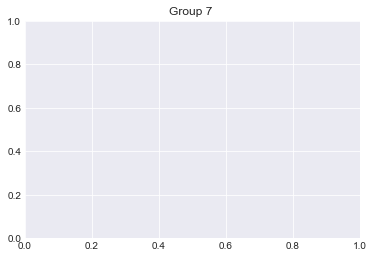

In [130]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('gist_rainbow')

fig8, ax8 = plt.subplots()
for row in pattern_from_sevendays_df[pattern_from_sevendays_df.cluster == 7].index:
    ax8.plot(pattern_from_sevendays_df.iloc[:,0:10].columns,
            pattern_from_sevendays_df.iloc[row,0:10].values,
            color=palette(row)
           )
ax8.set_title('Group 7 ')